In [41]:
import imageio
import glob
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
import seaborn as sns

In [12]:
##Path for Training data
path = "C:/Users/karni/Documents/Data Science and Society Coursework/Blok 1/Deep Learning/Assignment/Train Data set/Train/Train/"
##Path for Validation data
path2 = "C:/Users/karni/Documents/Data Science and Society Coursework/Blok 1/Deep Learning/Assignment/Train Data set/Test/Test/"

In [13]:
genders = ['Male', 'Female']
frmt = "png"



In [14]:
def imgtodataset(path, genders, frmt):
    data_l = []
    label_l = []
    
    for i in range(len(genders)):
        for im_path in glob.glob(path + genders[i] + "/*." + frmt):
            im = imageio.imread(im_path)
            arr = np.array(im)
            data_l.append(arr)
            label_l.append(i)

    data = np.array(data_l)
    label = np.array(label_l)        
    
    return data, label

In [15]:
data, label = imgtodataset(path, genders, frmt)

In [16]:
val_data, val_label = imgtodataset(path2, genders, frmt)

In [17]:
def imgtodataset2(path, genders, frmt):
    data_l = []
    label_l = []
    
    for i in range(len(genders)):
        for im_path in glob.glob(path + genders[i] + "/*." + frmt):
            im = imageio.imread(im_path)
            arr = np.array(im)
            dim = 100, 100
            arr_resize = cv2.resize(arr, dim)
            data_l.append(arr_resize)
            label_l.append(i)
    
    data = np.array(data_l)
    label = np.array(label_l)        
    
    return data, label

In [18]:
genders2 = ['man', 'woman']
frmt2 = "jpg"

In [19]:
path3 = "C:/Users/karni/Documents/Data Science and Society Coursework/Blok 1/Deep Learning/Assignment/Test Data set/faces/"

In [20]:
test_data, test_label = imgtodataset2(path3, genders2, frmt2)

In [21]:
data_pp = tf.keras.applications.vgg16.preprocess_input(
        data, data_format=None
    )

In [22]:
val_data_pp =  tf.keras.applications.vgg16.preprocess_input(
        val_data, data_format=None
    )

In [65]:
test_data_pp =  tf.keras.applications.vgg16.preprocess_input(
        test_data, data_format=None
    )

In [32]:
def getresultssummary(mod_history):
    # summarize history for accuracy
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(mod_history.history['binary_accuracy'], label='Training Accuracy')
    plt.plot(mod_history.history['val_binary_accuracy'], label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Binary Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(mod_history.history['loss'], label='Training Loss')
    plt.plot(mod_history.history['val_loss'], label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

In [58]:
def val_performance_reporting(model_file, val_data_pp, val_label, data_pp, label):
    m1 = keras.models.load_model(model_file)
    y_predt = np.round_(m1.predict(data_pp), decimals=0)
    y_pred1 = m1.predict(val_data_pp)
    y_pred = np.round_(y_pred1,decimals=0)
    
    labs = ['Male', 'Female']
    #Model Summary
    print(m1.summary())    
    
    #Performance Measures
    print("Training Performance")
    print(classification_report(label, y_predt, target_names=labs))
    print("")
    print("Validation Performance")
    print(classification_report(val_label, y_pred, target_names=labs))
    
    #Confusion Martix
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    cf_matrix = confusion_matrix(val_label, y_pred)
    sns.heatmap(cf_matrix, annot=True, xticklabels=labs, yticklabels=labs) 
    
    #ROC Curve
    fpr_keras, tpr_keras, thresholds_keras = roc_curve(val_label, y_pred1)
    auc_keras = auc(fpr_keras, tpr_keras)
    
    plt.subplot(1,2,2)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr_keras, tpr_keras, label='AUC (= {:.3f})'.format(auc_keras))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                294976    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 15,009,729
Trainable params: 295,041
Non-trainable params: 14,714,688
_________________________________________________________________
None
Training Performance
              precision    recall  f1-score   support

        Male       0.87     

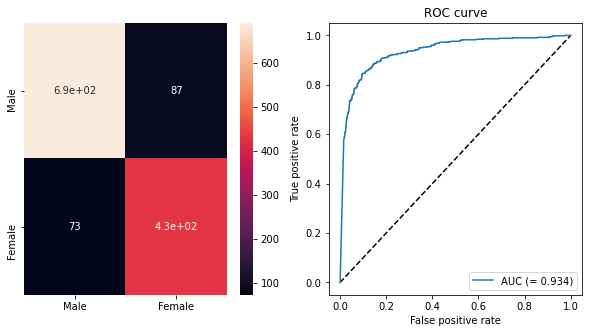

In [59]:
val_performance_reporting("Models/model_1_1", val_data_pp, val_label, data, label)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                294976    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 15,009,729
Trainable params: 295,041
Non-trainable params: 14,714,688
_________________________________________________________________
None
Training Performance
              precision    recall  f1-score   support

        Male       0.87   

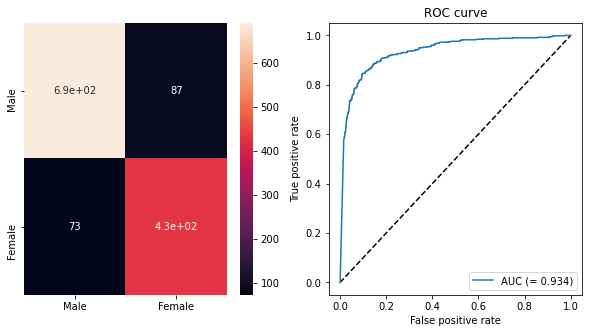

In [60]:
val_performance_reporting("Models/model_1_2", val_data_pp, val_label, data, label)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               1179904   
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 15,927,617
Trainable params: 1,212,929
Non-trainable params: 14,714,688
_______________________________________

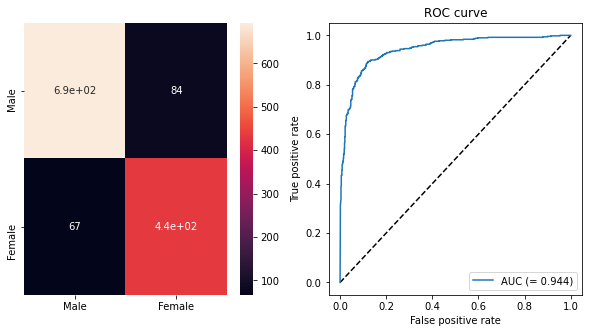

In [61]:
val_performance_reporting("Models/model_2", val_data_pp, val_label, data, label)

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 4609      
Total params: 14,719,297
Trainable params: 4,609
Non-trainable params: 14,714,688
_________________________________________________________________
None
Training Performance
              precision    recall  f1-score   support

        Male       0.80      0.81      0.81      5924
      Female       0.78      0.78      0.78      5211

    accuracy                           0.79     111

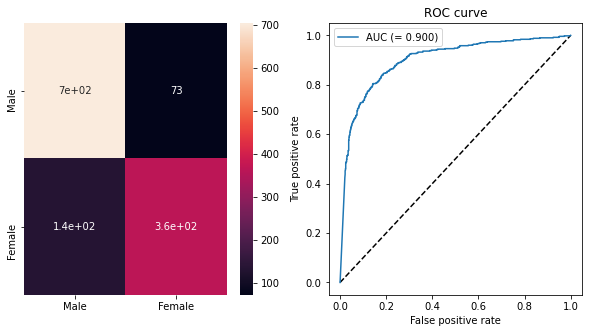

In [62]:
val_performance_reporting("Models/model_4", val_data_pp, val_label, data, label)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1179904   
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080  

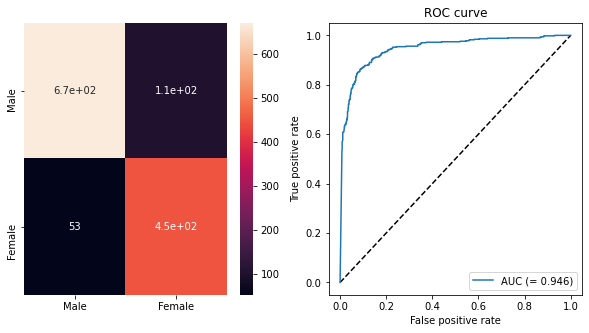

In [63]:
val_performance_reporting("Models/model_3_1.h5", val_data_pp, val_label, data, label)

Model Performance
              precision    recall  f1-score   support

        Male       0.94      0.93      0.93     17678
      Female       0.88      0.88      0.88      9489

    accuracy                           0.91     27167
   macro avg       0.91      0.91      0.91     27167
weighted avg       0.91      0.91      0.91     27167



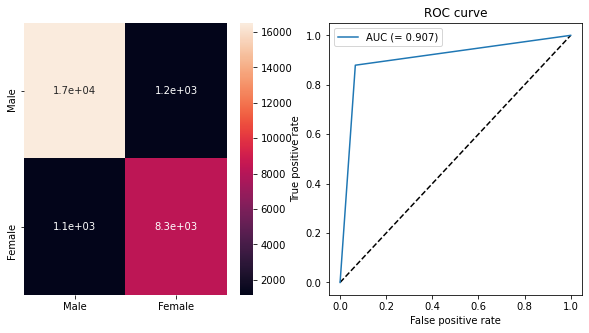

In [66]:
#Test Performance
model_file = "Models/model_2"
final_model = keras.models.load_model(model_file)

preds = np.round_(final_model.predict(test_data_pp), decimals=0)


print("Model Performance")
print(classification_report(test_label, preds, target_names=genders))

    #Confusion Martix
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
cf_matrix = confusion_matrix(test_label, preds)
sns.heatmap(cf_matrix, annot=True, xticklabels=genders, yticklabels=genders) 
    
    #ROC Curve
fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_label, preds)
auc_keras = auc(fpr_keras, tpr_keras)
    
plt.subplot(1,2,2)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='AUC (= {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9c67a883-3918-439e-a462-2827f4672e07' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>